In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from pickle import dump

In [5]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [6]:
# load data
dataset = pd.read_csv('database_for_tensorflow.csv')
dataset.head()

,Unnamed: 0,Composition,VEC,Electronegativity_Difference,Atomic_Radius_Diff,Mixing_Enthalpy,Mixing_Entropy,E/A,EWF,Mod_Mismatch,...,Cu,Zn,Zr,Nb,Mo,Sn,Hf,Ta,W,HV
0,0,Al0.024 Co0.244 Cr0.244 Fe0.244 Ni0.244,8.124000,0.100790,2.285452,-5.024448,12.191045,1.087280,11858.093680,-0.026248,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0
1,1,Al0.038 Cr0.192 Cu0.192 Fe0.192 Ni0.385,8.772773,0.103890,2.923514,0.131319,11.995661,1.132352,11793.295412,-0.046508,...,0.192192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0
2,2,Al0.053 Co0.211 Cr0.211 Fe0.263 Ni0.263,8.049950,0.103002,3.321519,-6.387830,12.590479,1.151059,11698.169776,-0.034465,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0
3,3,Al0.057 Co0.189 Cr0.189 Cu0.189 Fe0.189 Ni0.189,8.470060,0.103733,3.429843,0.142314,14.435532,1.144521,11237.013134,-0.052196,...,0.188623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185.0
4,4,Al0.057 Cr0.189 Cu0.189 Fe0.189 Ni0.377,8.657343,0.107455,3.458269,-0.833233,12.265556,1.169051,11640.451496,-0.052066,...,0.188811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    442 non-null    int64  
 1   Composition                   442 non-null    object 
 2   VEC                           442 non-null    float64
 3   Electronegativity_Difference  442 non-null    float64
 4   Atomic_Radius_Diff            442 non-null    float64
 5   Mixing_Enthalpy               442 non-null    float64
 6   Mixing_Entropy                442 non-null    float64
 7   E/A                           441 non-null    float64
 8   EWF                           442 non-null    float64
 9   Mod_Mismatch                  437 non-null    float64
 10  DeltaG                        437 non-null    float64
 11  ShearModG                     437 non-null    float64
 12  Tm                            442 non-null    float64
 13  Ec   

In [8]:
# Remove unnecessary columns

dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)


dataset.isna().sum()

VEC                             0
Electronegativity_Difference    0
Atomic_Radius_Diff              0
Mixing_Enthalpy                 0
Mixing_Entropy                  0
E/A                             1
EWF                             0
Mod_Mismatch                    5
DeltaG                          5
ShearModG                       5
Tm                              0
Ec                              0
Cond__AC                        0
Cond__AM                        0
Cond__HM                        0
Cond__PM                        0
Cond__WR                        0
Li                              0
Mg                              0
Al                              0
Si                              0
Sc                              0
Ti                              0
V                               0
Cr                              0
Mn                              0
Fe                              0
Ni                              0
Co                              0
Cu            

In [9]:
# Remove rows with missing values
dataset = dataset.dropna()

In [10]:
dataset.tail()

,VEC,Electronegativity_Difference,Atomic_Radius_Diff,Mixing_Enthalpy,Mixing_Entropy,E/A,EWF,Mod_Mismatch,DeltaG,ShearModG,...,Cu,Zn,Zr,Nb,Mo,Sn,Hf,Ta,W,HV
437,4.600000,0.112889,7.480508,-1.280000,11.076352,1.1500,5943.054538,-0.008866,0.017262,41.80,...,0.00,0.0,0.200000,0.200000,0.0,0.0,0.000000,0.000000,0.0,304.0
438,4.500000,0.117154,7.048398,-0.250000,11.526292,1.2125,5851.485962,-0.008586,0.017833,40.50,...,0.00,0.0,0.250000,0.250000,0.0,0.0,0.000000,0.000000,0.0,335.0
439,8.940000,0.088188,2.632617,-1.670400,13.487136,1.0942,12193.944527,-0.025792,0.047403,68.06,...,0.18,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,541.0
440,6.800000,0.150013,7.461999,-26.400000,13.381611,1.4780,10135.337998,-0.065543,0.129356,60.60,...,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,816.0
441,4.166667,0.122610,4.902773,-14.777778,14.897516,1.7150,5372.454845,-0.054108,0.125625,40.00,...,0.00,0.0,0.166667,0.166667,0.0,0.0,0.166667,0.166667,0.0,441.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 441
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   VEC                           436 non-null    float64
 1   Electronegativity_Difference  436 non-null    float64
 2   Atomic_Radius_Diff            436 non-null    float64
 3   Mixing_Enthalpy               436 non-null    float64
 4   Mixing_Entropy                436 non-null    float64
 5   E/A                           436 non-null    float64
 6   EWF                           436 non-null    float64
 7   Mod_Mismatch                  436 non-null    float64
 8   DeltaG                        436 non-null    float64
 9   ShearModG                     436 non-null    float64
 10  Tm                            436 non-null    float64
 11  Ec                            436 non-null    float64
 12  Cond__AC                      436 non-null    int64  
 13  Cond_

In [12]:
# Split data into X and y
y = dataset['HV']
X = dataset.drop(['HV'], axis=1)

#The two following lines could be used to select only part of the columns: 
#X = dataset[['VEC','E/A', 'Ec', 'Mixing_Entropy', 'EWF', 'Mod_Mismatch', 'Mixing_Enthalpy', 'Atomic_Radius_Diff', 'Electronegativity_Difference',
#           'Cond__PM', 'Cond__AC',  'Cond__AM', 'Cond__HM', 'Cond__WR']]

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.25, 
                                                    random_state=42)

#Applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#The following line can be used to save the standarscaler:
dump(sc, open('/Scaler/scaler.pkl', 'wb'))

In [10]:
# Function to build the model
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[17], reg_l2=0.01, dropout=0.2):
    model = keras.Sequential()
    options = {"input_shape": input_shape}
    model.add(keras.Input(shape=(len(X.keys()))))
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons, kernel_regularizer=regularizers.l2(reg_l2), 
                 activation='elu'))
        model.add(layers.Dropout(dropout))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

# Inicial training

In [11]:
model = build_model(n_hidden=3, n_neurons=110, learning_rate=0.0005, reg_l2=0.0001, dropout=0.2)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 110)               4290      
_________________________________________________________________
dropout (Dropout)            (None, 110)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 110)               12210     
_________________________________________________________________
dropout_1 (Dropout)          (None, 110)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 110)               12210     
_________________________________________________________________
dropout_2 (Dropout)          (None, 110)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [13]:
EPOCHS = 5000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()], batch_size=5)


Epoch: 0, loss:236612.5156,  mae:447.7405,  mse:236612.4531,  val_loss:227217.4062,  val_mae:445.4913,  val_mse:227217.3906,  
....................................................................................................
Epoch: 100, loss:7181.2832,  mae:64.6682,  mse:7181.2188,  val_loss:5341.2490,  val_mae:60.2029,  val_mse:5341.1855,  
....................................................................................................
Epoch: 200, loss:4927.8384,  mae:54.0765,  mse:4927.7544,  val_loss:4588.9028,  val_mae:53.7271,  val_mse:4588.8203,  
....................................................................................................
Epoch: 300, loss:4665.1021,  mae:48.8166,  mse:4665.0015,  val_loss:4343.2056,  val_mae:50.3935,  val_mse:4343.1040,  
....................................................................................................
Epoch: 400, loss:3418.0237,  mae:43.3979,  mse:3417.9092,  val_loss:3966.5103,  val_mae:48.0760,  val_mse:3966.

....................................................................................................
Epoch: 3800, loss:1784.9395,  mae:31.2820,  mse:1784.6923,  val_loss:3950.0400,  val_mae:45.9885,  val_mse:3949.7920,  
....................................................................................................
Epoch: 3900, loss:1639.5510,  mae:30.1176,  mse:1639.2996,  val_loss:3906.7234,  val_mae:44.5509,  val_mse:3906.4717,  
....................................................................................................
Epoch: 4000, loss:1688.8979,  mae:30.5447,  mse:1688.6436,  val_loss:3890.3198,  val_mae:45.7782,  val_mse:3890.0652,  
....................................................................................................
Epoch: 4100, loss:1881.2783,  mae:31.3758,  mse:1881.0208,  val_loss:3879.5991,  val_mae:44.9427,  val_mse:3879.3411,  
....................................................................................................
Epoch: 4200, lo

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
4995,1693.116943,30.062962,1692.830200,3827.323975,44.766254,3827.037598,4995
4996,2049.917480,30.927647,2049.630615,3896.834229,44.949886,3896.548828,4996
4997,1363.791260,27.051308,1363.504883,4008.928955,45.330124,4008.642090,4997
4998,1819.264160,32.287720,1818.977173,4017.094727,45.009979,4016.808350,4998
4999,1720.588379,31.068398,1720.301514,3938.835205,45.709732,3938.548828,4999


In [15]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=3)

Text(0, 0.5, 'MAE [HV]')

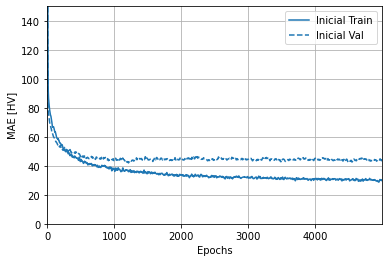

In [16]:
plotter.plot({'Inicial': history}, metric = "mae")
plt.ylim([0, 150])
plt.ylabel('MAE [HV]')

Text(0, 0.5, 'MSE [HV^2]')

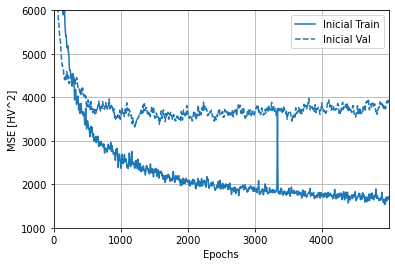

In [17]:
plotter.plot({'Inicial': history}, metric = "mse")
plt.ylim([1000, 6000])
plt.ylabel('MSE [HV^2]')

# Training with early stopping

In [18]:
model = build_model(n_hidden=3, n_neurons=110, learning_rate=0.0005, reg_l2=0.0001, dropout=0.2)

MAX_EPOCHS = 5000

# Early stop callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=150)

early_history = model.fit(X_train, y_train, 
                    epochs=MAX_EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()],
                         batch_size = 5)


Epoch: 0, loss:236996.8125,  mae:447.9100,  mse:236996.7969,  val_loss:227917.8594,  val_mae:445.9268,  val_mse:227917.8125,  
....................................................................................................
Epoch: 100, loss:7707.7329,  mae:68.3932,  mse:7707.6709,  val_loss:5194.8721,  val_mae:57.5732,  val_mse:5194.8096,  
....................................................................................................
Epoch: 200, loss:5392.4907,  mae:56.4814,  mse:5392.4092,  val_loss:4094.1624,  val_mae:50.1422,  val_mse:4094.0811,  
....................................................................................................
Epoch: 300, loss:3933.3796,  mae:48.9292,  mse:3933.2800,  val_loss:3742.2983,  val_mae:47.7146,  val_mse:3742.1987,  
....................................................................................................
Epoch: 400, loss:3649.7075,  mae:46.5750,  mse:3649.5930,  val_loss:3555.8906,  val_mae:46.3804,  val_mse:3555.

Text(0, 0.5, 'MAE [HV]')

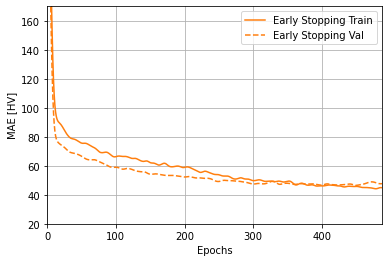

In [19]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([20, 170])
plt.ylabel('MAE [HV]')

Text(0, 0.5, 'MSE [HV]')

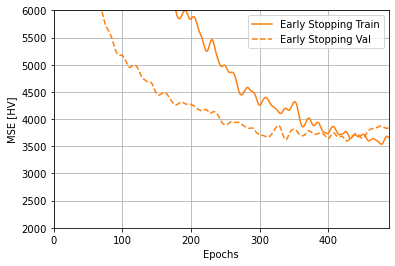

In [20]:
plotter.plot({'Early Stopping': early_history}, metric = "mse")
plt.ylim([2000, 6000])
plt.ylabel('MSE [HV]')

In [21]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} HV".format(mae))

4/4 - 0s - loss: 2871.9207 - mae: 39.7689 - mse: 2871.7942
Testing set Mean Abs Error: 39.77 HV


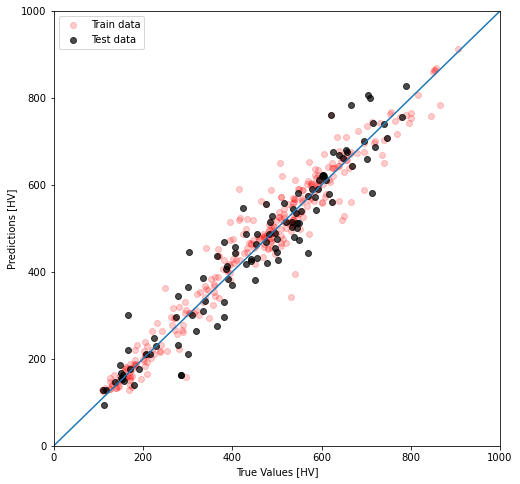

In [22]:
test_predictions = model.predict(X_test).flatten()
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'red', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='black', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [HV]')
plt.ylabel('Predictions [HV]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

# Saving model

In [24]:
model.save('/saved_model/my_model')

INFO:tensorflow:Assets written to: /saved_model/my_model\assets


# Keras tuner 

In [13]:
import kerastuner as kt

In [14]:
from kerastuner import HyperModel
class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = keras.Sequential()
        model.add(
            layers.Dense(
                units=hp.Int('units', 64, 256, 16, default=8),
                kernel_regularizer=regularizers.l2(hp.Choice('reg_value', [0.0001,0.001,0.01,0.1,0.005,0.05])),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid', 'elu'],
                    default='elu'),
                input_shape=input_shape
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.4,
                    default=0.005,
                    step=0.05)
            )
        )        
        
        model.add(
            layers.Dense(
                units=hp.Int('units', 64, 256, 16, default=16),
                kernel_regularizer=regularizers.l2(hp.Choice('reg_value', [0.0001,0.001,0.01,0.1,0.005,0.05])),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid', 'elu'],
                    default='elu')
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.4,
                    default=0.005,
                    step=0.05)
            )
        )
        
        model.add(
            layers.Dense(
                units=hp.Int('units', 64, 256, 16, default=16),
                kernel_regularizer=regularizers.l2(hp.Choice('reg_value', [0.0001,0.001,0.01,0.1,0.005,0.05])),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid', 'elu'],
                    default='elu')
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.4,
                    default=0.005,
                    step=0.05)
            )
        )
              
        model.add(layers.Dense(1))
        
        hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4, 1e-5]) 
        optimizer = keras.optimizers.Adam(hp_learning_rate)
        model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
        
        return model

In [15]:
input_shape = (len(X.keys()),)
hypermodel = RegressionHyperModel(input_shape)

In [16]:
import IPython

class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)
        
early_stop_tuner = keras.callbacks.EarlyStopping(monitor='val_loss', patience=150)        

In [17]:
tuner_bo = kt.BayesianOptimization(
            hypermodel,
            objective='mse',
            max_trials=100,
            seed=42,
            executions_per_trial=2
        )
tuner_bo.search(X_train, y_train, epochs=2000, validation_split=0.2, 
                verbose=1, callbacks = [ClearTrainingOutput(), early_stop_tuner],
               batch_size=5)

best_model = tuner_bo.get_best_models(num_models=1)[0]
best_model.evaluate(X_test, y_test)

Trial 50 Complete [00h 05m 22s]
mse: 6134.58837890625

Best mse So Far: 1676.940673828125
Total elapsed time: 04h 16m 07s
INFO:tensorflow:Oracle triggered exit
4/4 [==============================] - 0s 7ms/step - loss: 5493.5513 - mae: 57.7919 - mse: 5490.4453


[5493.55126953125, 57.79193115234375, 5490.4453125]

In [18]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 112)               4368      
_________________________________________________________________
dropout (Dropout)            (None, 112)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 112)               12656     
_________________________________________________________________
dropout_1 (Dropout)          (None, 112)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 112)               12656     
_________________________________________________________________
dropout_2 (Dropout)          (None, 112)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [56]:
# Get the optimal hyperparameters
best_hps = tuner_bo.get_best_hyperparameters(num_trials = 1)[0]

best_hps.get('units')

112

In [27]:
best_hps.get('dropout')

0.02

In [57]:
best_hps.get('learning_rate')

0.01

In [28]:
best_hps.get('dense_activation')

'relu'

In [29]:
best_hps.get('reg_value')

0.001

# Test Keras tuner model

In [42]:
# Function to build the model
def build_model_test(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[17], reg_l2=0.01, dropout=0.2):
    model = keras.Sequential()
    options = {"input_shape": input_shape}
    model.add(keras.Input(shape=(len(X.keys()))))
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons, kernel_regularizer=regularizers.l2(reg_l2), 
                 activation='relu'))
        model.add(layers.Dropout(dropout))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [50]:
test_model = build_model_test(n_hidden=3, n_neurons=112, learning_rate=0.01, reg_l2=0.001, dropout=0.02)

MAX_EPOCHS_test = 5000

# Early stop callback
early_stop_test = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1000)

early_history_test = test_model.fit(X_train, y_train, 
                    epochs=MAX_EPOCHS_test, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop_test, tfdocs.modeling.EpochDots()],
                         batch_size = 5)


Epoch: 0, loss:68267.5859,  mae:197.4511,  mse:68267.1719,  val_loss:12273.3252,  val_mae:92.0166,  val_mse:12272.8896,  
....................................................................................................
Epoch: 100, loss:3564.9065,  mae:45.1636,  mse:3563.4573,  val_loss:4858.0068,  val_mae:51.6476,  val_mse:4856.5542,  
....................................................................................................
Epoch: 200, loss:2920.2883,  mae:40.0073,  mse:2918.1204,  val_loss:5940.0986,  val_mae:58.4403,  val_mse:5937.9194,  
....................................................................................................
Epoch: 300, loss:2522.4229,  mae:36.8303,  mse:2519.6826,  val_loss:5419.3428,  val_mae:53.5014,  val_mse:5416.6104,  
....................................................................................................
Epoch: 400, loss:3028.7480,  mae:41.9402,  mse:3025.3965,  val_loss:4433.6479,  val_mae:48.5385,  val_mse:4430.2778,

Text(0, 0.5, 'MAE [HV]')

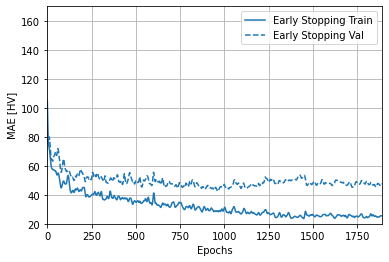

In [51]:
plotter_test = tfdocs.plots.HistoryPlotter(smoothing_std=3)
plotter_test.plot({'Early Stopping': early_history_test}, metric = "mae")
plt.ylim([20, 170])
plt.ylabel('MAE [HV]')

Text(0, 0.5, 'MSE [HV]')

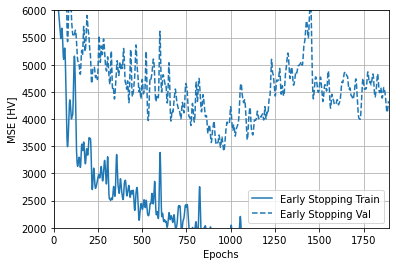

In [52]:
plotter_test.plot({'Early Stopping': early_history_test}, metric = "mse")
plt.ylim([2000, 6000])
plt.ylabel('MSE [HV]')

In [53]:
test_loss, test_mae, test_mse = test_model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} HV".format(test_mae))

4/4 - 0s - loss: 5172.7720 - mae: 51.7901 - mse: 5164.2866
Testing set Mean Abs Error: 51.79 HV


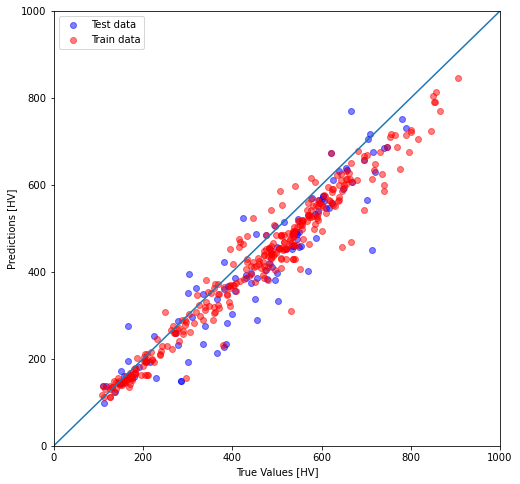

In [54]:
best_test_predictions_test = best_model.predict(X_test).flatten()
best_train_predictions_test = best_model.predict(X_train).flatten()


plt.figure(figsize=(8,8))
plt.scatter(y_test, best_test_predictions_test, c='blue', alpha = 0.5, label = 'Test data')
plt.scatter(y_train, best_train_predictions_test, c= 'red', alpha =0.5, label = 'Train data')
plt.xlabel('True Values [HV]')
plt.ylabel('Predictions [HV]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)